# UTS DATA MINING

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi
- metode KNN
- metode pohon keputusan (Desision tree)

## Import dataset

In [3]:
import pandas as pd
import numpy as np
dataset = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
df = pd.read_csv(dataset)

In [4]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
df.shape

(116, 10)

Membagi data input dan data klasifikasi

In [6]:
X = df.drop(columns=["Classification"]).values
y = df.Classification

## Split Dataset into Train and Test Data

Melakukan spliting dataset digunakan untuk membagi data latih dan data uji yang nantinya akan digunakan untuk menghitung akurasi dari model klasifikasi.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92, 9), (24, 9), (92,), (24,))

Melakukan Feature Scaling agar jarak data dapat diprediksi dengan baik.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Metode K-Nearest Neighbor (KNN)

Membuat klasifikasi KNN dengan K=3

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

Menghitung akurasi dari model KNN

In [14]:
print("Score data latih  :", (knn.score(X_train_scaled, y_train)*100),"%")
print("Score data uji    :", (knn.score(X_test_scaled, y_test)*100),"%")

Score data latih  : 85.86956521739131 %
Score data uji    : 70.83333333333334 %


Dengan menggunakan model KNN, ketika data dilatih mendapatkan score sekitar 80% namun ketika ditest dengan data uji scorenya menurun.

## 2. Metode Pohon Keputusan (Decision Tree)

Membuat klasifikasi Decision Tree

In [15]:
from sklearn import tree
from matplotlib import pyplot as plt
# Create DecisionTree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train_scaled, y_train)

Membuat Design Decision Tree

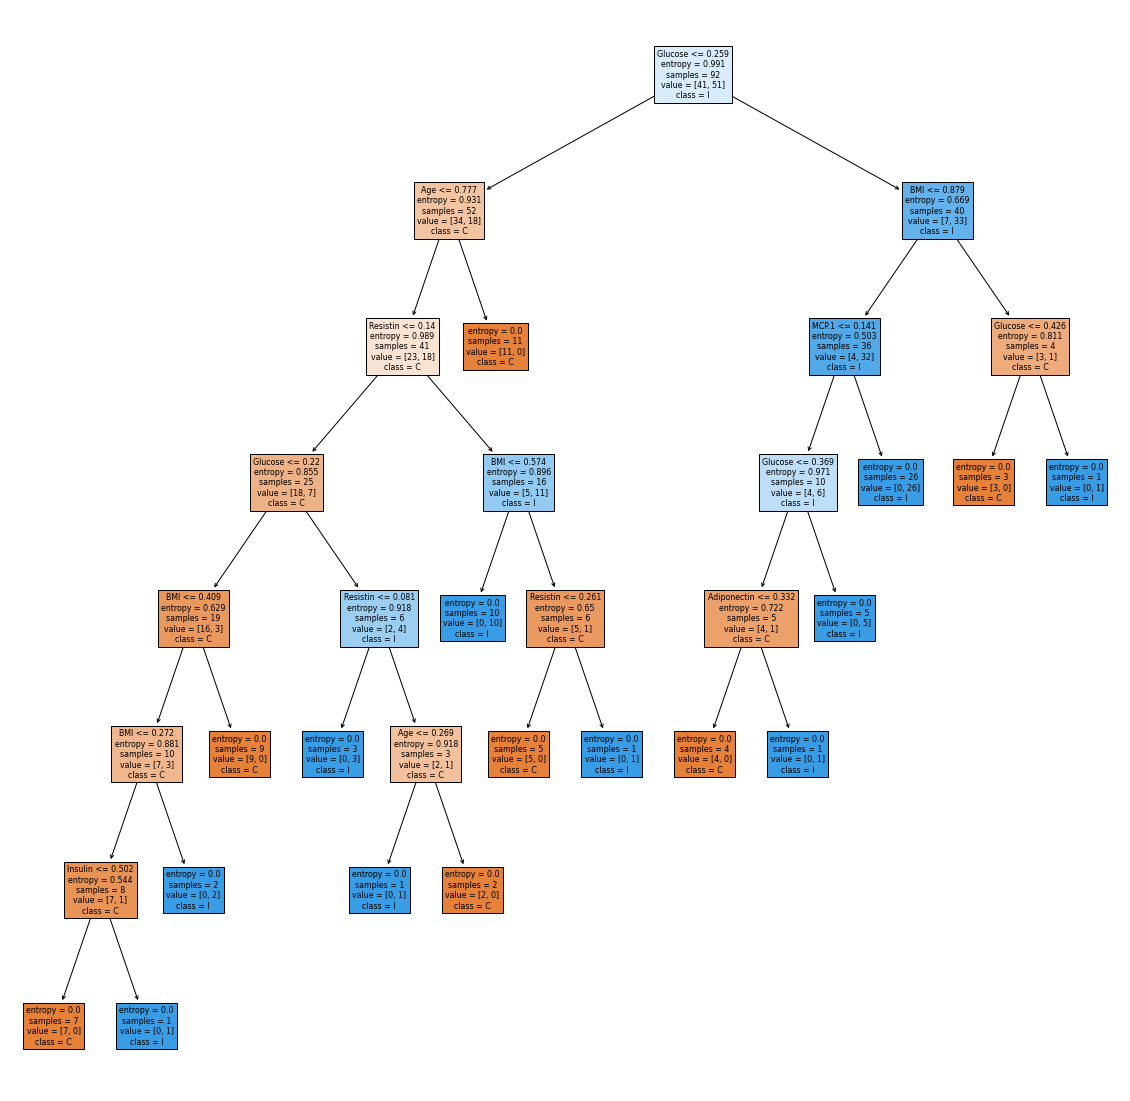

In [16]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(df.columns.values)[:9], class_names=list(df.columns.values)[9] ,filled=True)

Menghitung score akurasi

In [17]:
print("Score data latih :", clf_tree.score(X_train_scaled, y_train)*100,"%")
print("Score data uji   :", clf_tree.score(X_test_scaled, y_test)*100,"%")

Score data latih : 100.0 %
Score data uji   : 62.5 %


Dengan menggunakan model Decision Tree, ketika data dilatih mendapatkan score sempurna 100%, tetapi ketika diuji dengan data uji scorenya menurun.